# 60 Hz 的波要怎麼畫

## y = sin(2 * pi * f * t)

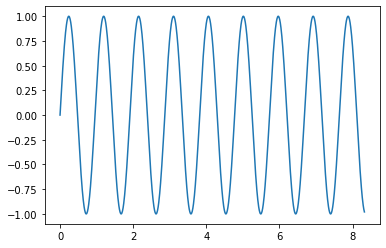

0.008333333333333333


In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

f = 60 # hz

dt = 1 / (2 * f)

def func_sin(deg):
    return math.sin(deg * math.pi / 180)

y = np.vectorize(func_sin)

deg_ls = np.arange(1000) * dt

sin_ls = y(2*math.pi*f*deg_ls)
    

plt.figure()
plt.plot(deg_ls, sin_ls)
    
plt.show()

print(dt)
    

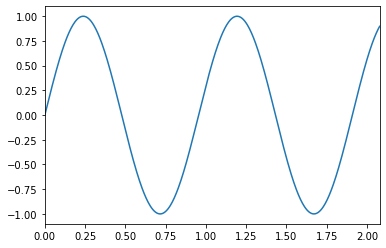

hi


In [13]:
def func_sin(deg):
    return math.sin(deg * math.pi / 180)

def func_PlotSin(num, f=60, dt=1/120):
    
    F = f

    dT = dt

    y = np.vectorize(func_sin)

    deg_ls = np.arange(num) * dT

    sin_ls = y(2*math.pi*F*deg_ls)

    plt.figure()
    plt.plot(deg_ls, sin_ls)
    plt.xlim((0, deg_ls[-1]))

    plt.show()
    
    print('hi')
    
func_PlotSin(num=500, f=60, dt=1/240)
# func_PlotSin(num=10)
    
    
    

# 平均濾波


(200,)
mean of n1: -0.0312
std of n1: 0.9643
statistics of single noise: 0.097 (0.964)
statistics of average noise: 0.010 (0.097)
noise level improvement: 0.097 => 0.010 ==> ratio: 9.949
Theoretical impropement: 10.0000


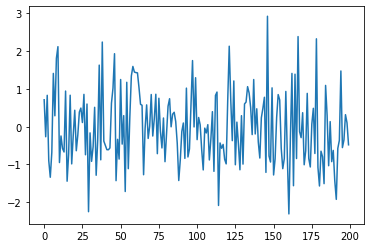

In [23]:
import numpy as np

def func_GenNoise(num):
    
    return np.random.randn(num)

def func_AnaNoise(noise):
    mean = np.mean(noise)
    std = np.std(noise)
    
    return mean, std


num = 200
num_avg = 100

n1 = func_GenNoise(num)
mean, std = func_AnaNoise(n1)

print(n1.shape)
print('mean of n1: %1.4f' %(mean))
print('std of n1: %1.4f' %(std))


plt.figure()   
plt.plot(np.arange(num), n1)

# noise_ls = [func_GenNoise(num) for i in range(10)]  # 寫法一
noise_ls = []

for i in range(10):
    noise_ls.append(func_GenNoise(num))  # 寫法二
    
noise_ls = np.zeros((num_avg, num))

for i in range(num_avg):
    noise_ls[i, :] = func_GenNoise(num)    
    
noise_avg = np.mean(noise_ls, 0)

mean, std = func_AnaNoise(noise_ls[0, :])
mean_avg, std_avg = func_AnaNoise(noise_avg)

print('statistics of single noise: %1.3f (%1.3f)' %(mean, std))
print('statistics of average noise: %1.3f (%1.3f)' %(mean_avg, std_avg))

print('noise level improvement: %1.3f => %1.3f ==> ratio: %1.3f' %(np.abs(mean), np.abs(mean_avg), np.abs(mean/mean_avg)))

print('Theoretical impropement: %1.4f' %(np.sqrt(num_avg)))

In [83]:
# noise_avg = np.mean(noise_ls, 0)



# mean, std = func_AnaNoise(noise_ls[0, :])
# mean_avg, std_avg = func_AnaNoise(noise_avg)

# print('statistics of single noise: %1.3f (%1.3f)' %(mean, std))
# print('statistics of average noise: %1.3f (%1.3f)' %(mean_avg, std_avg))

# print('noise level improvement: %1.3f => %1.3f ==> ratio: %1.3f' %(np.abs(mean), np.abs(mean_avg), np.abs(mean/mean_avg)))

# print('Theoretical impropement: %1.4f' %(np.sqrt(num_avg)))

statistics of single noise: -0.007 (0.968)
statistics of average noise: 0.085 (0.406)
noise level improvement: 0.007 => 0.085 ==> ratio: 0.078
Theoretical impropement: 3.1623


# 自製平均濾波器

(<matplotlib.axes._subplots.AxesSubplot at 0x1e037460c88>,
 [<matplotlib.lines.Line2D at 0x1e0387c12b0>])

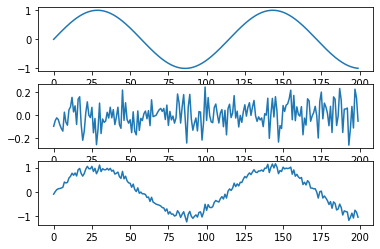

In [27]:

def func_PlotSin2(num, f=60, dt=1/120):
    
    F = f
    dT = dt
    y = np.vectorize(func_sin)
    deg_ls = np.arange(num) * dT
    sin_ls = y(2*math.pi*F*deg_ls)    
    return sin_ls

def func_GenNoise(num):    
    return np.random.randn(num)

num = 200
signal = func_PlotSin2(num, f=60, dt=1/120)
# noise = func_GenNoise(len(signal))
noise = 0.1*func_GenNoise(len(signal))
time = np.arange(len(signal))
actu_signal = signal+noise

plt.figure()
plt.subplot(3, 1, 1), plt.plot(time, signal)
plt.subplot(3, 1, 2), plt.plot(time, noise)
plt.subplot(3, 1, 3), plt.plot(time, actu_signal)


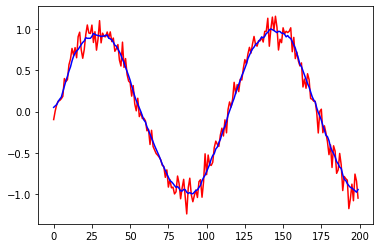

In [31]:
def func_MeanFilter(signal, w=1):
    
    signal_proc = np.zeros(len(signal))
    
    for i in range(len(signal)):
        
        idx_min = np.max([i-w, 0])  # max 防止指標超出最小範圍
        idx_max = np.min([i+w, len(signal)]) # min 防止指標超出最大範圍
#         idx_max = np.min((i+w, len(signal)))
        
        temp_ls = signal[idx_min:idx_max]
        
        temp_mean = np.mean(temp_ls)
        
        signal_proc[i] = temp_mean   ##### 不懂 ???
        
    return signal_proc


actu_signal_proc = func_MeanFilter(actu_signal, w=5)

# plt.figure()
# plt.subplot(2, 1, 1), plt.plot(time, actu_signal)
# plt.subplot(2, 1, 2), plt.plot(time, actu_signal_proc)


plt.figure()
plt.plot(time, actu_signal, 'r', time, actu_signal_proc, 'b--')
plt.show()    
    
    

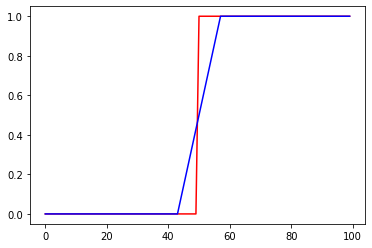

In [37]:
# 高通
sig_sqrt = np.zeros(100)

sig_sqrt[50:] = 1

sig_sqrt_proc = func_MeanFilter(sig_sqrt ,w=7) # why w=7 ??

plt.figure()
plt.plot(np.arange(len(sig_sqrt)), sig_sqrt, 'r', np.arange(len(sig_sqrt)), sig_sqrt_proc, 'b')

Text(0.5, 1.0, 'median filter')

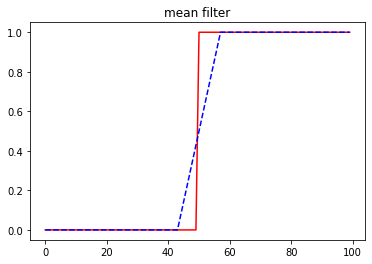

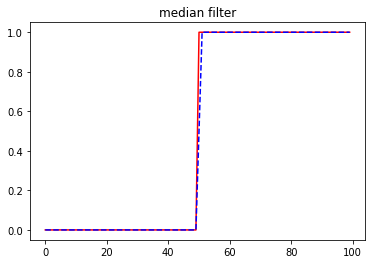

In [38]:

def func_median(signal, w=1):    

    signal_proc = np.zeros(len(signal))
    
    for i in range(len(signal)):
        
        idx_min = np.max([i-w, 0])
        idx_max = np.min([i+w, len(signal)])
#         idx_max = np.min((i+w, len(signal)))
        
        temp_ls = signal[idx_min:idx_max]
        
        temp_median = np.median(temp_ls)
        
        signal_proc[i] = temp_median
        
    return signal_proc

w = 7
actu_signal = sig_sqrt
actu_signal_median = func_median(actu_signal, w=w)
actu_signal_mean = func_MeanFilter(actu_signal, w=w)
# actu_signal_mean = func_median(actu_signal, w=5)
# actu_signal_median = func_MeanFilter(actu_signal, w=5)

# plt.figure()
# plt.subplot(2, 1, 1), plt.plot(time, actu_signal)
# plt.subplot(2, 1, 2), plt.plot(time, actu_signal_proc)

time = np.arange(len(actu_signal))
plt.figure()
plt.plot(time, actu_signal, 'r', time, actu_signal_mean, 'b--')
plt.title('mean filter')
plt.figure()
plt.plot(time, actu_signal, 'r', time, actu_signal_median, 'b--')
plt.title('median filter')


w_mean:  [0.2 0.2 0.2 0.2 0.2]
w_gau:  [0.1 0.2 0.4 0.2 0.1]


Text(0.5, 1.0, 'gaussian filter')

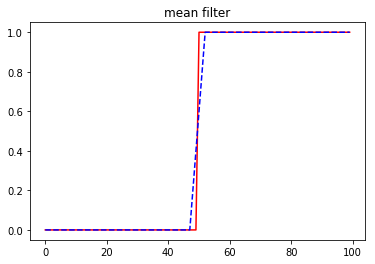

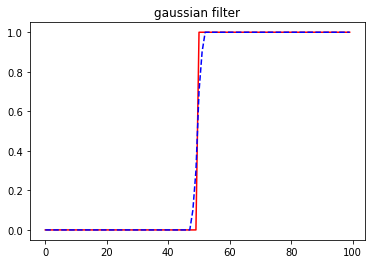

In [209]:
w_mean = [1, 1, 1, 1, 1]
w_mean /= np.sum(w_mean)
w_gau = [1, 2, 4, 2 ,1]
w_gau /= np.sum(w_gau)

print('w_mean: ', w_mean)
print('w_gau: ', w_gau)


def func_filter(signal, filt):
    
    signal_proc = signal.copy()
#     signal_proc = np.zeros(len(signal))
    
    w=int((len(filt)-1)/2)
    
    for i in range(w, len(signal)-w):
        
        temp_ls = signal[i-w:i+w+1]
        
        temp = np.dot(temp_ls, filt)
        
        signal_proc[i] = temp
        
    return signal_proc
    
num = 200
signal = func_PlotSin2(num, f=60, dt=1/120)
# noise = func_GenNoise(len(signal))
noise = 0.1*func_GenNoise(len(signal))
time = np.arange(len(signal))
# actu_signal = signal+noise


actu_signal = sig_sqrt

actu_signal_mean = func_filter(actu_signal, w_mean)
actu_signal_gau = func_filter(actu_signal, w_gau)


time = np.arange(len(actu_signal))
plt.figure()
plt.plot(time, actu_signal, 'r', time, actu_signal_mean, 'b--')
plt.title('mean filter')
plt.figure()
plt.plot(time, actu_signal, 'r', time, actu_signal_gau, 'b--')
plt.title('gaussian filter')



In [195]:
a = [1, 2, 3, 4, 5]
b = [3, 4, 5, 6, 7]

c = np.dot(a, b)

print(c)

85
